In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import napari
import numpy as np
from skimage import exposure, util
import imageio as io
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
from sklearn.experimental import enable_iterative_imputer
import napari
from sklearn.impute import IterativeImputer
import numpy as np
from segmentation.util.utils_postprocessing import calc_split_point_via_brightnesses
from scipy.signal._peak_finding import find_peaks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Immobilized worm

In [2]:
fname = "/scratch/zimmer/Charles/dlc_stacks/immobilized-2021_10_25/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname)

Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/immobilized-2021_10_25 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: False



# Test known undersegmentation

In [53]:
t = 14

this_mask = project_data.raw_segmentation[t, ...]
this_red = project_data.red_data[t,...]

In [54]:
i_mask = 68

this_mask_one_ind = this_mask==i_mask
these_vals_per_z = [this_red[z, this_mask_one_ind[z,...]] for z in range(this_red.shape[0])]

In [55]:
these_mean_per_z = [np.mean(vals) for vals in these_vals_per_z]

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


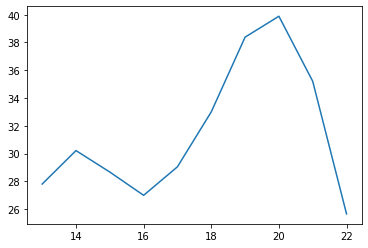

In [56]:
plt.plot(these_mean_per_z)

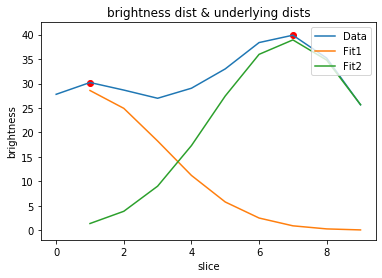

(3,
 [1, 7],
 array([        nan, 28.58058842, 24.9311023 , 18.25178632, 11.21405936,
         5.78247688,  2.50241042,  0.90885951,  0.27703111,  0.07086861]),
 array([        nan,  1.37884672,  3.87992832,  9.01826849, 17.31467588,
        27.45979676, 35.9726157 , 38.92588225, 34.79338303, 25.68896451]))

In [57]:
y = np.array(these_mean_per_z)[~np.isnan(these_mean_per_z)]
out = calc_split_point_via_brightnesses(y, min_separation=3, verbose=1, plots=2)
out

15


/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


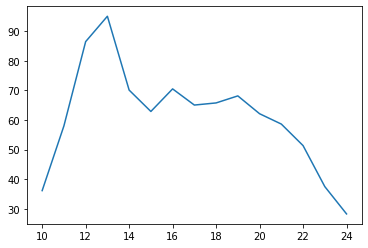

In [49]:
t = 23

this_mask = project_data.raw_segmentation[t, ...]
this_red = project_data.red_data[t,...]

i_mask = 53

this_mask_one_ind = this_mask==i_mask
these_vals_per_z = [this_red[z, this_mask_one_ind[z,...]] for z in range(this_red.shape[0])]

these_mean_per_z = [np.mean(vals) for vals in these_vals_per_z]

print(np.sum(~np.isnan(these_mean_per_z)))

plt.plot(these_mean_per_z)

/home/charles/Current_work/repos/segmentation/segmentation/util/utils_postprocessing.py:410: RuntimeWarning: divide by zero encountered in true_divide
  return A1*np.exp(-(x-mu1)**2/(2.*sigma1**2)) + A2*np.exp(-(x-mu2)**2/(2.*sigma2**2))
/home/charles/Current_work/repos/segmentation/segmentation/util/utils_postprocessing.py:410: RuntimeWarning: invalid value encountered in true_divide
  return A1*np.exp(-(x-mu1)**2/(2.*sigma1**2)) + A2*np.exp(-(x-mu2)**2/(2.*sigma2**2))


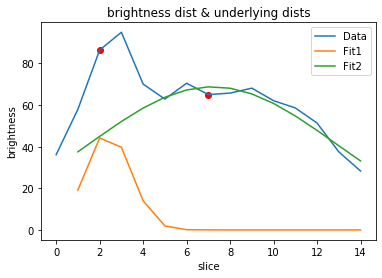

(5,
 [2, 7],
 array([           nan, 1.91875351e+01, 4.41605280e+01, 3.97537568e+01,
        1.39975150e+01, 1.92775819e+00, 1.03844385e-01, 2.18797485e-03,
        1.80314429e-05, 5.81229279e-08, 7.32813284e-11, 3.61383260e-14,
        6.97062270e-18, 5.25900966e-22, 1.55190527e-26]),
 array([        nan, 37.54434752, 44.93468091, 52.11012263, 58.55525286,
        63.75481042, 67.2610107 , 68.75703677, 68.104255  , 65.36340588,
        60.78528168, 54.77287351, 47.82290458, 40.45849343, 33.16551884]))

In [52]:
y = np.array(these_mean_per_z)[~np.isnan(these_mean_per_z)]
out = calc_split_point_via_brightnesses(y, min_separation=3, verbose=1, plots=2)
out

In [41]:
peaks, _ = find_peaks(these_mean_per_z, distance=4)
peaks

array([13, 17, 21])

In [48]:
y

array([ 41.80645161,  65.57142857,  97.94871795, 112.46236559,
        95.61702128,  77.68965517,  72.25      ,  74.33783784,
        71.97916667,  74.6484375 ,  80.109375  ,  84.52      ,
        68.69333333,  49.50684932,  34.26760563,  27.18987342])

# Freely moving

In [2]:
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname)

Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm3-tracklet_wiggle 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



# Known oversegmentation

In [3]:
t = 0

this_mask = project_data.raw_segmentation[t, ...]
this_red = project_data.red_data[t,...]

i_mask = [163, 51]

this_mask_one_ind = np.logical_or(*[this_mask==i for i in i_mask])
these_vals_per_z = [this_red[z, this_mask_one_ind[z,...]] for z in range(this_red.shape[0])]

these_mean_per_z = [np.mean(vals) for vals in these_vals_per_z]

print("Length: ", np.sum(~np.isnan(these_mean_per_z)))

plt.plot(these_mean_per_z)

Length:  13


/home/charles/anaconda3/envs/segmentation/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/charles/anaconda3/envs/segmentation/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
y = np.array(these_mean_per_z)[~np.isnan(these_mean_per_z)]
out = calc_split_point_via_brightnesses(y, min_separation=6, verbose=1, plots=2)
out

Peaks too close, aborting: Means = [5, 5]


utils_postprocessing.py (410): divide by zero encountered in true_divide
utils_postprocessing.py (410): invalid value encountered in true_divide


ValueError: x and y must be the same size

# Redo segmentation

In [11]:
from segmentation.util.utils_model import segment_with_stardist_2d, get_stardist_model
from segmentation.util.utils_pipeline import perform_post_processing_2d

In [9]:
sd_model = get_stardist_model('lukas')

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.458531, nms_thresh=0.4.


In [155]:
t = 1

this_old_mask = project_data.raw_segmentation[t, ...]
this_red = project_data.red_data[t,...]

raw_2d_segmentation = segment_with_stardist_2d(this_red, sd_model)

In [156]:
opt_postprocessing = dict(upper_length_threshold=12,
                          min_separation=5,
  lower_length_threshold= 3,
  to_remove_border= False,
  border_width_to_remove= 0,
  to_remove_dim_slices= True)

In [157]:
verbose = 3
final_masks = perform_post_processing_2d(raw_2d_segmentation,
                                             this_red,
                                             **opt_postprocessing,
                                             verbose=verbose - 1)

Starting preprocessing with 183 neurons
Note: not yet stitched in z
Removing large areas in all planes
After large area removal: 109
Bipartite stitching. Input array shape: (32, 700, 900)


  0%|          | 0/1386 [00:00<?, ?it/s]

After stitching: 156
Successfully Fit 2 gaussians to neuron 2 with split: [10]
Additional neuron ID: 157
Successfully Fit 2 gaussians to neuron 18 with split: [7]
Additional neuron ID: 158
Successfully Fit 2 gaussians to neuron 29 with split: [13]
Additional neuron ID: 159
Successfully Fit 2 gaussians to neuron 30 with split: [11]
Additional neuron ID: 160
Successfully Fit 2 gaussians to neuron 41 with split: [8]
Additional neuron ID: 161
Successfully Fit 2 gaussians to neuron 44 with split: [12]
Additional neuron ID: 162
Successfully Fit 2 gaussians to neuron 45 with split: [10]
Additional neuron ID: 163
Successfully Fit 2 gaussians to neuron 48 with split: [9]
Additional neuron ID: 164
Successfully Fit 2 gaussians to neuron 53 with split: [11]
Additional neuron ID: 165
Successfully Fit 2 gaussians to neuron 55 with split: [8]
Additional neuron ID: 166
Successfully Fit 2 gaussians to neuron 56 with split: [10]
Additional neuron ID: 167
Successfully Fit 2 gaussians to neuron 57 with sp

In [103]:
# %debug

In [158]:
v = napari.Viewer(ndisplay=3)
v.add_image(this_red)
v.add_labels(final_masks)

<Labels layer 'final_masks' at 0x7f2c984beb50>

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/segmentation/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles/anaconda3/envs/segmentation/lib/python3.7/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "/home/charles/anaconda3/envs/segmentation/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/home/charles/anaconda3/envs/segmentation/lib/python3.7/asyncio/base_events.py", line 526, in _check_runnung
    'Cannot run the event loop while another loop is running')
RuntimeError: Cannot run the event loop while another loop is running
ERROR:tornado.general:Uncaught exception in zmqstream callback
Traceback (most recent call last):
  File "/home/charles/a

Length of z stitched mask:  13


fromnumeric.py (3420): Mean of empty slice.
_methods.py (188): invalid value encountered in double_scalars


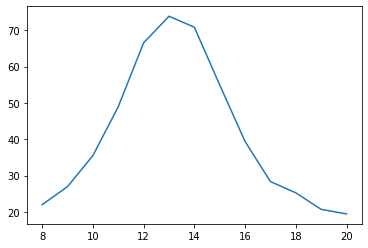

In [115]:
# Check some failures

# i_mask = [21]
i_mask = [51, 151]
# i_mask = [160, 67]

this_mask = final_masks

if len(i_mask) == 1:
    this_mask_one_ind = this_mask==i_mask
elif len(i_mask) == 2:
    this_mask_one_ind = np.logical_or(*[this_mask==i for i in i_mask])
else:
    raise ValueError
these_vals_per_z = [this_red[z, this_mask_one_ind[z,...]] for z in range(this_red.shape[0])]
these_mean_per_z = [np.mean(vals) for vals in these_vals_per_z]

print("Length of z stitched mask: ", np.sum(~np.isnan(these_mean_per_z)))
%matplotlib inline
plt.plot(these_mean_per_z)


Error in heights: [53, -13]
Impossible location; returning None


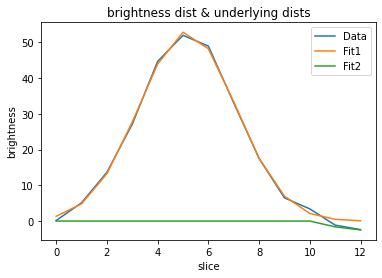

(None,
 None,
 array([ 0.14192033,  5.11923255, 13.65172242, 27.10824046, 44.69125234,
        51.99754471, 48.97434594, 33.09315599, 17.52562352,  6.4994673 ,
         3.40886256, -1.14194088, -2.3951138 ]),
 array([ 1.32616725,  4.81446373, 13.26085652, 27.71208922, 43.93807208,
        52.85508328, 48.23991811, 33.40414793, 17.54964237,  6.99536177,
         2.11556378,  0.48541825,  0.08450456]),
 array([-0.00000000e+000, -0.00000000e+000, -6.28015158e-294,
        -2.15945638e-235, -2.43780758e-183, -9.03514423e-138,
        -1.09938912e-098, -4.39185971e-066, -5.76004878e-040,
        -2.48018766e-020, -3.50609438e-007, -1.62720902e+000,
        -2.47938380e+000]),
 array([ 21.83866219,  53.06424018,   5.16912753,   1.9029858 ,
        -13.05985038,  11.52820918,  -0.2588094 ]),
 [15, 40.96745553318981, 3.25, 2.5, 40.96745553318981, 9.75, 2.5])

In [152]:
y = np.array(these_mean_per_z)[~np.isnan(these_mean_per_z)]
out = calc_split_point_via_brightnesses(y, min_separation=5, verbose=1, plots=1, num_gaussians=2, return_all=True)
out

In [145]:
err = np.sum(np.square(out[2] - out[3]))
err

14.667402310581279

In [148]:
err = np.sum(np.square(out[2] - out[3] - out[4]))
err

5.870598334536063

In [46]:
any(np.abs(np.diff(a)) < t)

False